In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
path = '../datasets/'
train = pd.read_csv(path + 'security_train.csv')
test = pd.read_csv(path + 'security_test.csv')

In [3]:
train_analysis = train[['file_id', 'label']].drop_duplicates(subset=['file_id', 'label'], keep='last')
dic_ = train['file_id'].value_counts().to_dict()
train_analysis['file_id_cnt'] = train_analysis['file_id'].map(dic_).values
train_analysis['file_id_cnt'].value_counts()

5001     448
268      211
44       186
4        160
16       149
        ... 
9984       1
14082      1
16131      1
7943       1
16384      1
Name: file_id_cnt, Length: 6204, dtype: int64

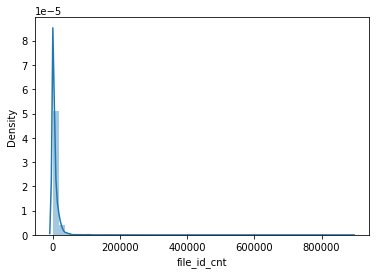

In [4]:
sns.distplot(train_analysis['file_id_cnt'])

In [5]:
def file_id_cnt_cut(x):
    if x < 15000:
        return x // 1e3
    else:
        return 15

train_analysis['file_id_cnt_cut'] = train_analysis['file_id_cnt'].map(file_id_cnt_cut).values

Text(0, 0.5, 'label_number')

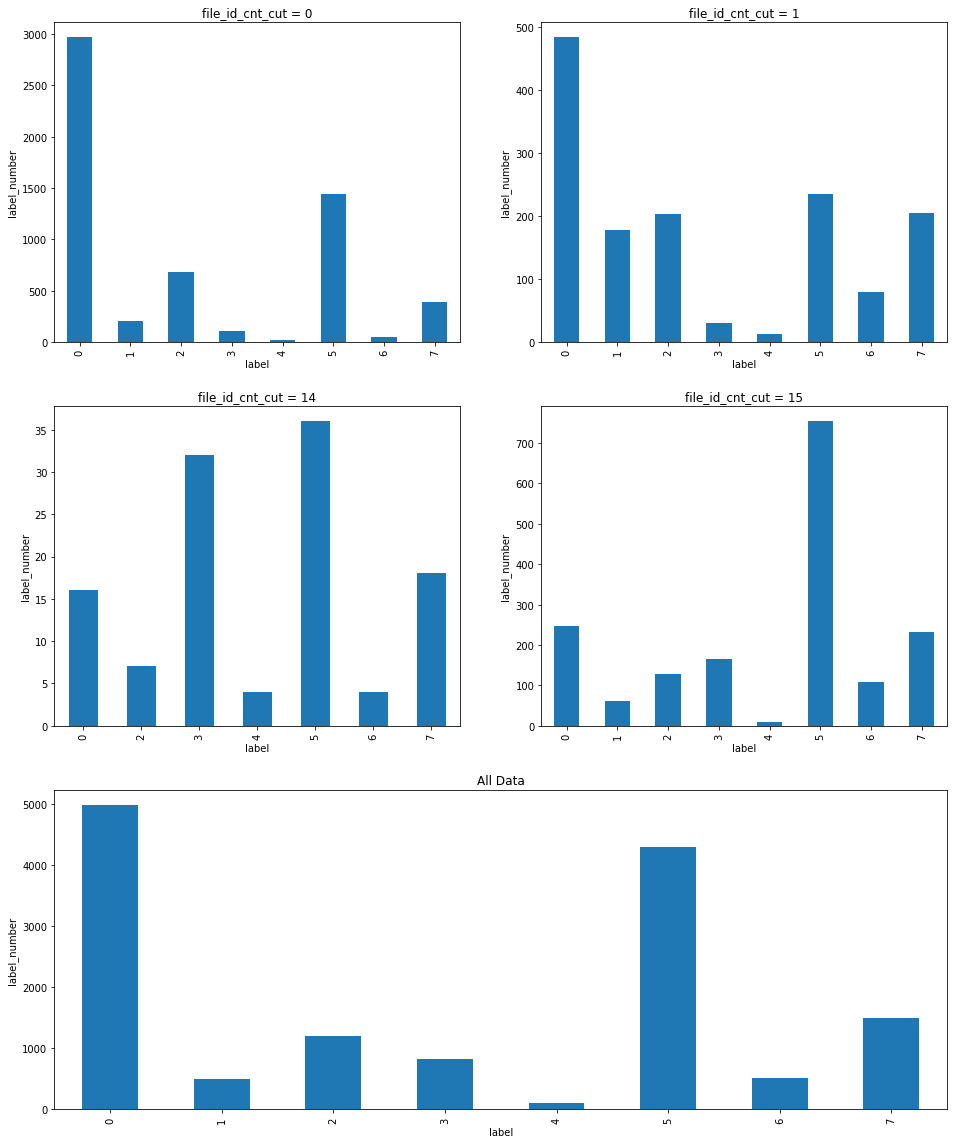

In [6]:
plt.figure(figsize=[16,20])
plt.subplot(321) 
train_analysis[train_analysis['file_id_cnt_cut'] == 0]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 0')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(322)
train_analysis[train_analysis['file_id_cnt_cut'] == 1]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 1')
plt.xlabel('label')
plt.ylabel('label_number')
 
plt.subplot(323)
train_analysis[train_analysis['file_id_cnt_cut'] == 14]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 14')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(324)
train_analysis[train_analysis['file_id_cnt_cut'] == 15]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 15')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(313) 
train_analysis['label'].value_counts().sort_index().plot(kind = 'bar') 
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number') 

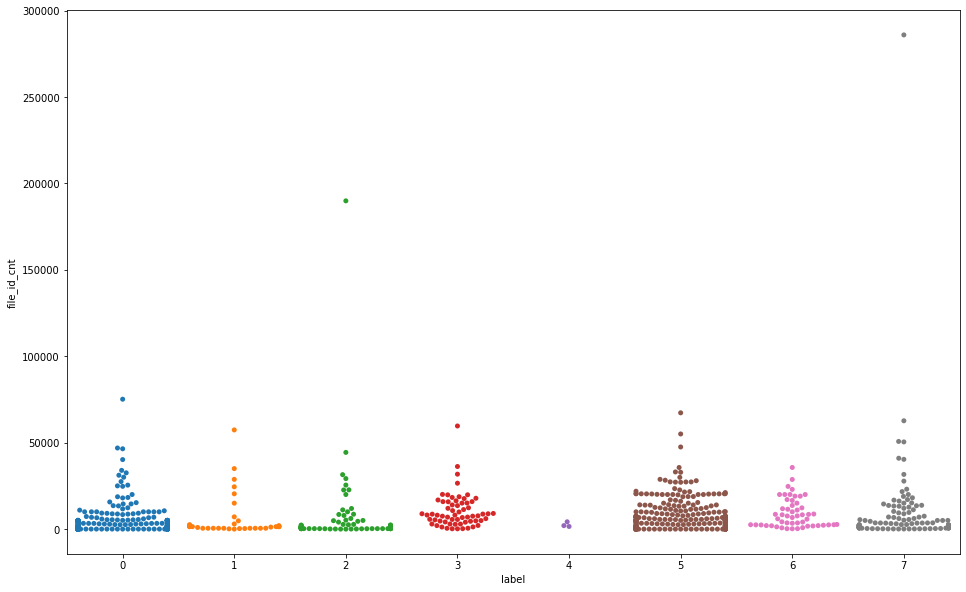

In [7]:
plt.figure(figsize=[16, 10])
sns.swarmplot(x=train_analysis.iloc[:1000]['label'], y=train_analysis.iloc[:1000]['file_id_cnt'])

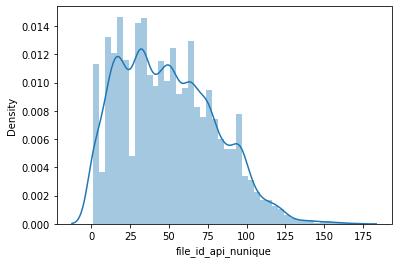

In [8]:
dic_ = train.groupby('file_id')['api'].nunique().to_dict()
train_analysis['file_id_api_nunique'] = train_analysis['file_id'].map(dic_).values
sns.distplot(train_analysis['file_id_api_nunique'])

In [9]:
train_analysis['file_id_api_nunique'].describe()

count    13887.000000
mean        49.263700
std         30.338888
min          1.000000
25%         24.000000
50%         47.000000
75%         71.000000
max        170.000000
Name: file_id_api_nunique, dtype: float64

Text(0, 0.5, 'label number')

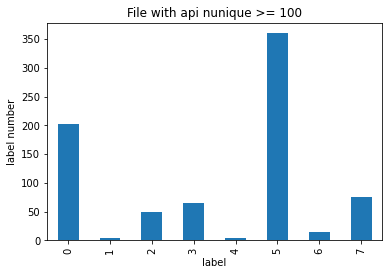

In [10]:
train_analysis.loc[train_analysis.file_id_api_nunique >= 100]['label'].value_counts().sort_index().plot(kind='bar')
plt.title('File with api nunique >= 100')
plt.xlabel('label')
plt.ylabel('label number')

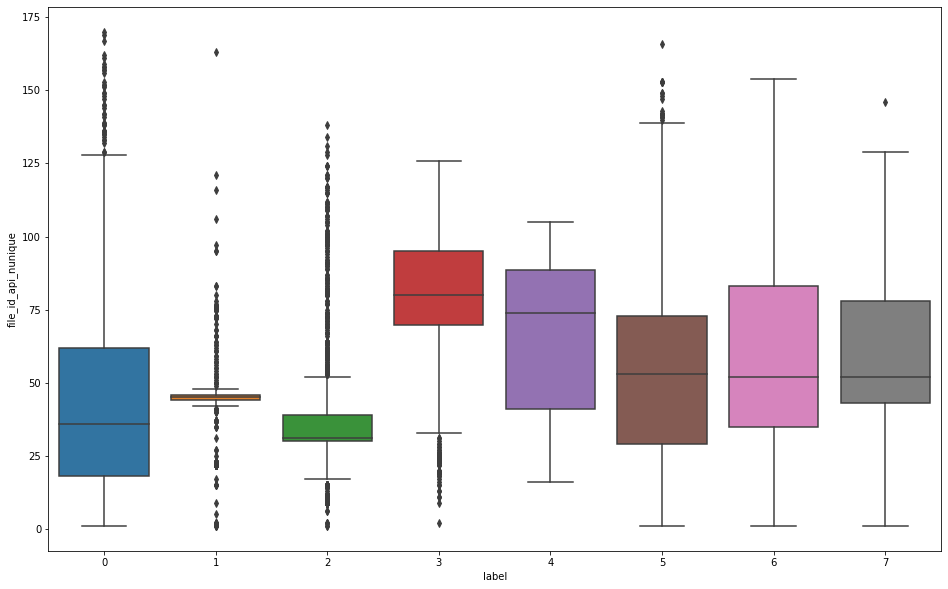

In [11]:
plt.figure(figsize=[16, 10])
sns.boxplot(x=train_analysis['label'], y=train_analysis['file_id_api_nunique'])

In [12]:
dic_ = train.groupby('file_id')['index'].nunique().to_dict()
train_analysis['file_id_index_nunique'] = train_analysis['file_id'].map(dic_).values
train_analysis['file_id_index_nunique'].describe()

count    13887.000000
mean      1770.645136
std       1934.542352
min          1.000000
25%        135.000000
50%        924.000000
75%       3628.000000
max       5001.000000
Name: file_id_index_nunique, dtype: float64

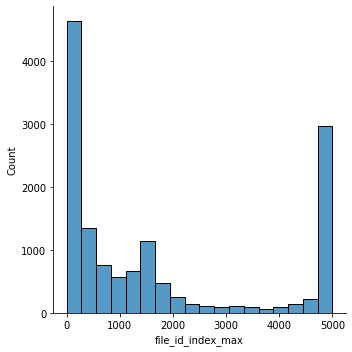

In [13]:
dic_ = train.groupby('file_id')['index'].max().to_dict()
train_analysis['file_id_index_max'] = train_analysis['file_id'].map(dic_).values
sns.displot(train_analysis['file_id_index_max'])

Text(0, 0.5, 'label_number')

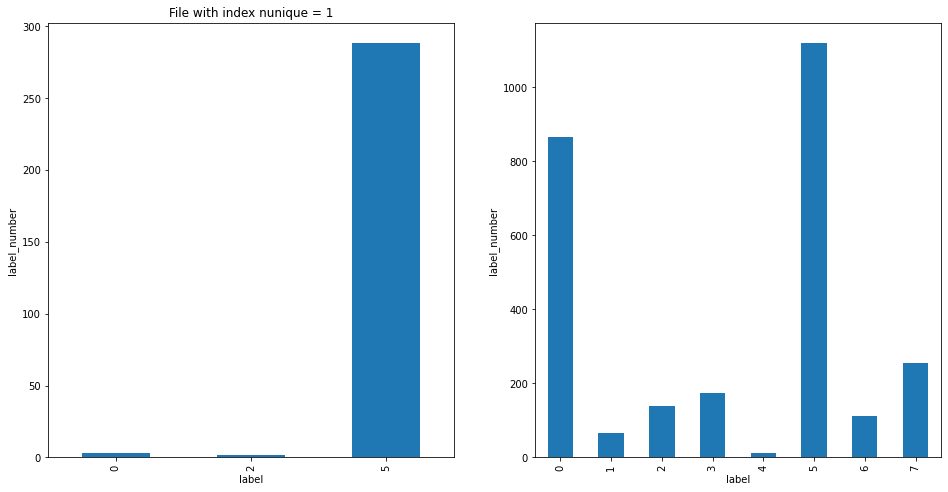

In [14]:
plt.figure(figsize=[16, 8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_index_nunique == 1]['label'].value_counts().sort_index().plot(kind='bar')
plt.title('File with index nunique = 1')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_index_nunique == 5001]['label'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('label')
plt.ylabel('label_number')

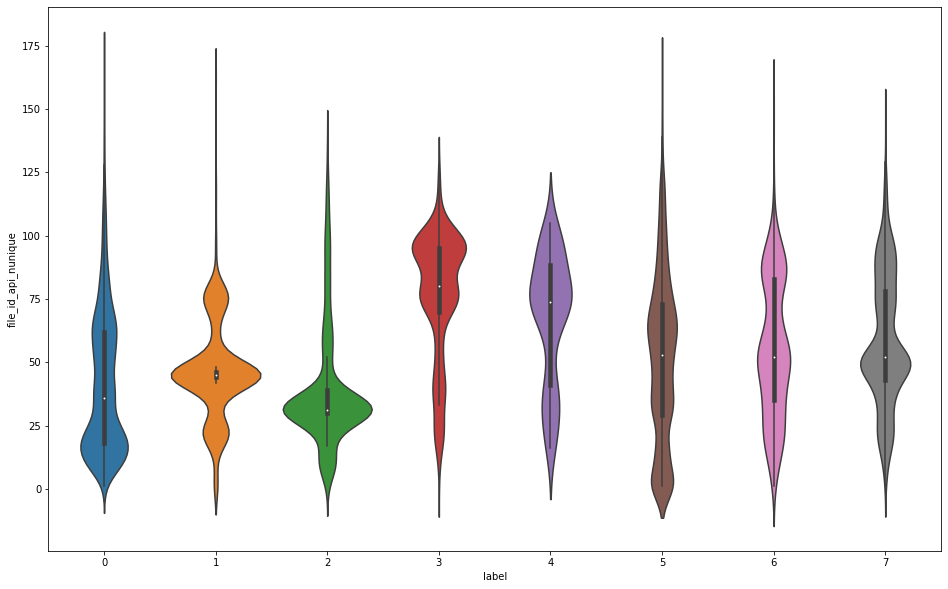

In [15]:
plt.figure(figsize=[16, 10])
sns.violinplot(x=train_analysis['label'], y=train_analysis['file_id_api_nunique'])

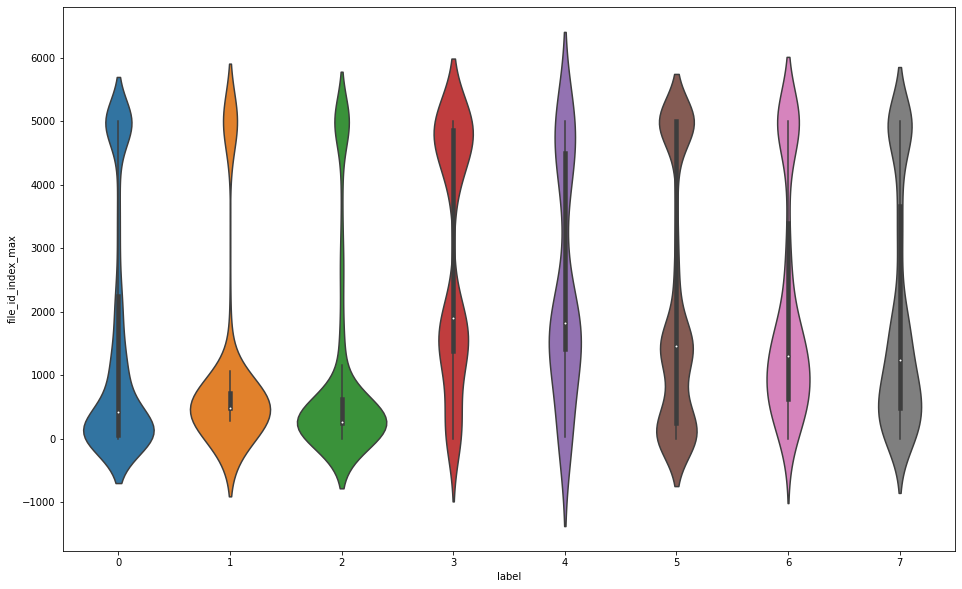

In [16]:
plt.figure(figsize=[16, 10])
sns.violinplot(x=train_analysis['label'], y=train_analysis['file_id_index_max'])

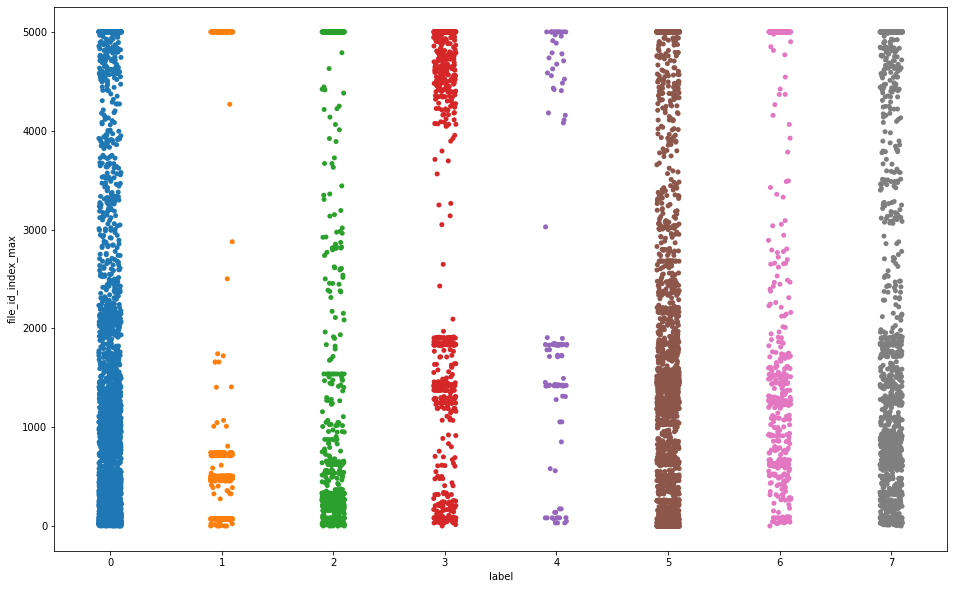

In [17]:
plt.figure(figsize=[16, 10])
sns.stripplot(x=train_analysis['label'], y=train_analysis['file_id_index_max'])

In [18]:
dic_ = train.groupby('file_id')['tid'].nunique().to_dict()
train_analysis['file_id_tid_nunique'] = train_analysis['file_id'].map(dic_).values
train_analysis['file_id_tid_nunique'].describe()

count    13887.000000
mean        18.797724
std         55.212772
min          1.000000
25%          2.000000
50%          4.000000
75%         17.000000
max       1965.000000
Name: file_id_tid_nunique, dtype: float64

In [19]:
dic_ = train.groupby('file_id')['tid'].max().to_dict()
train_analysis['file_id_tid_max'] = train_analysis['file_id'].map(dic_).values
train_analysis['file_id_tid_max'].describe()

count    13887.000000
mean      2782.530424
std        420.516683
min        184.000000
25%       2612.000000
50%       2792.000000
75%       2964.000000
max      20896.000000
Name: file_id_tid_max, dtype: float64

Text(0, 0.5, 'label_number')

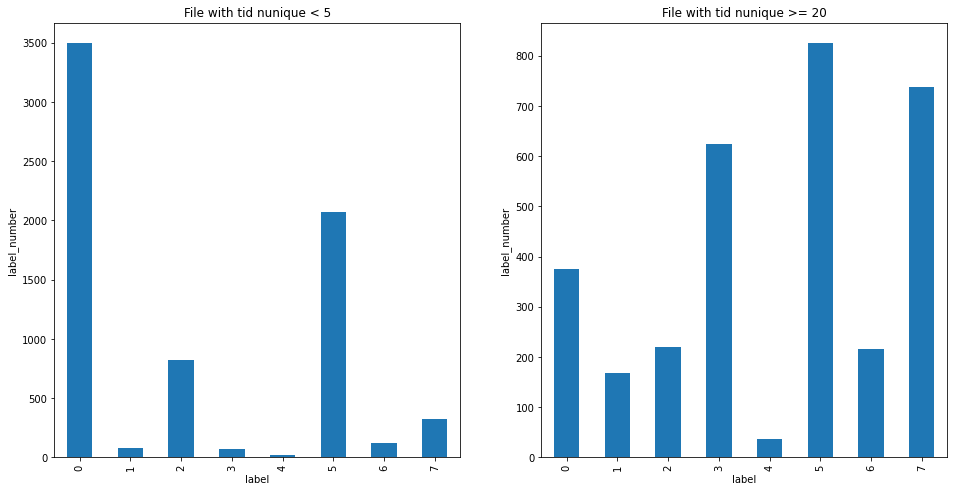

In [20]:
plt.figure(figsize=[16, 8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_nunique < 5]['label'].value_counts().sort_index().plot(kind='bar')
plt.title('File with tid nunique < 5')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_tid_nunique >= 20]['label'].value_counts().sort_index().plot(kind='bar')
plt.title('File with tid nunique >= 20')
plt.xlabel('label')
plt.ylabel('label_number')

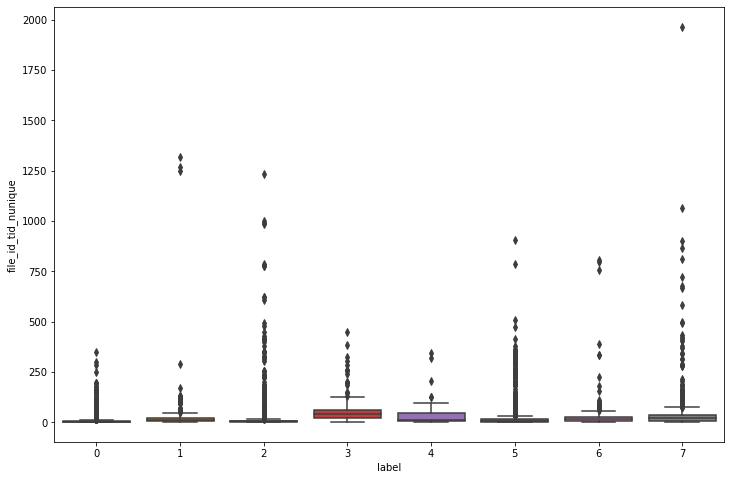

In [21]:
plt.figure(figsize=[12, 8])
sns.boxplot(x=train_analysis['label'], y=train_analysis['file_id_tid_nunique'])

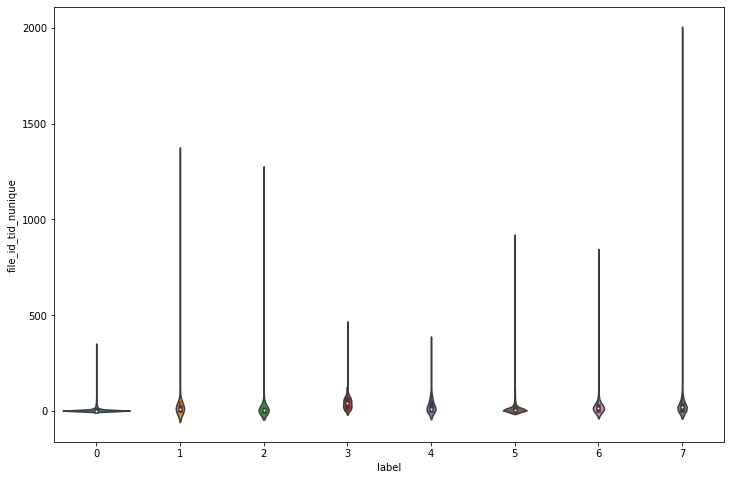

In [22]:
plt.figure(figsize=[12, 8])
sns.violinplot(x=train_analysis['label'], y=train_analysis['file_id_tid_nunique'])

Text(0, 0.5, 'label_number')

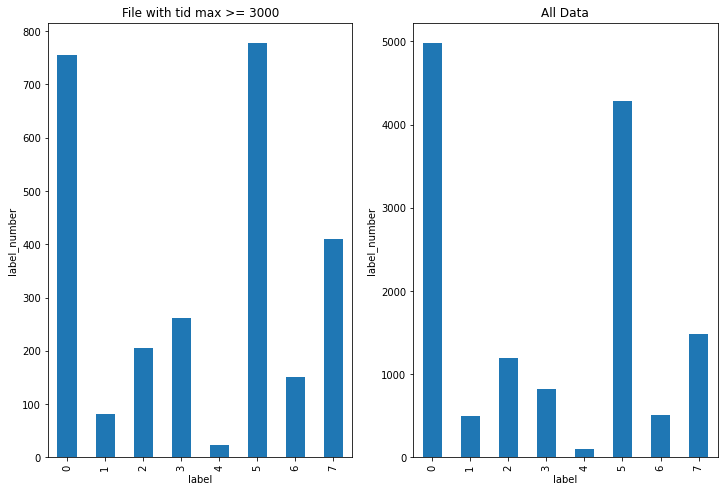

In [23]:
plt.figure(figsize=[12, 8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_max >= 3000]['label'].value_counts().sort_index().plot(kind='bar')
plt.title('File with tid max >= 3000')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(122)
train_analysis['label'].value_counts().sort_index().plot(kind='bar')
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number')

In [24]:
train['api_label'] = train['api'] + '_' + train['label'].astype(str)
dic_ = train['api_label'].value_counts().to_dict()

df_api_label = pd.DataFrame.from_dict(dic_, orient='index').reset_index()
df_api_label.columns = ['api_label', 'api_label_count']

df_api_label['label'] = df_api_label['api_label'].apply(lambda x: int(x.split('_')[-1]))

labels = df_api_label['label'].unique()
for label in range(8):
    print('*' * 22, label, '*' * 22)
    print(df_api_label.loc[df_api_label.label == label].sort_values('api_label_count').iloc[-5:][['api_label', 'api_label_count']])
    print('*' * 47)

********************** 0 **********************
                   api_label  api_label_count
20     CryptDecodeObjectEx_0           808724
19           RegOpenKeyExW_0           815653
11  LdrGetProcedureAddress_0          1067389
9                  NtClose_0          1150929
5         RegQueryValueExW_0          1793509
***********************************************
********************** 1 **********************
                    api_label  api_label_count
180             RegCloseKey_1            83134
160              NtReadFile_1           101051
102  LdrGetProcedureAddress_1           199218
75                  NtClose_1           268922
72         RegQueryValueExW_1           283562
***********************************************
********************** 2 **********************
                   api_label  api_label_count
47              NtReadFile_2           429733
34          Process32NextW_2           609066
28        RegQueryValueExW_2           704073
27  LdrGetProcedur